## Random Forest

#### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error

In [2]:
# Load the dataset
df = pd.read_csv(r"temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


#### Data Visualization

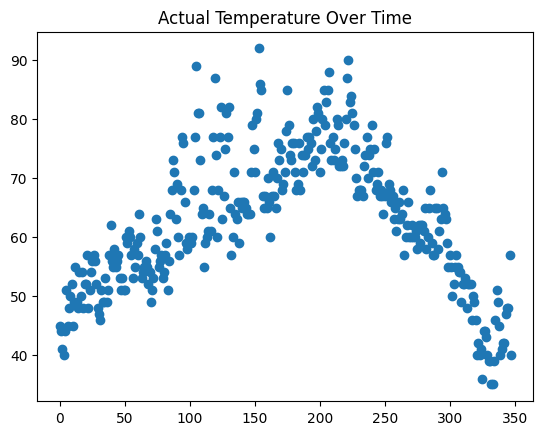

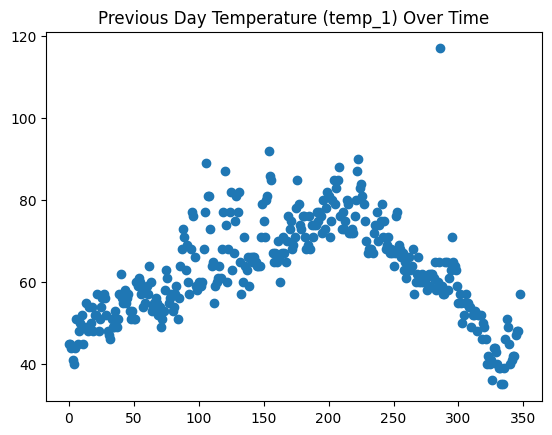

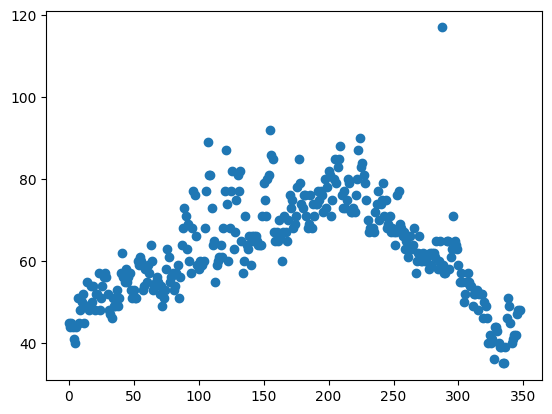

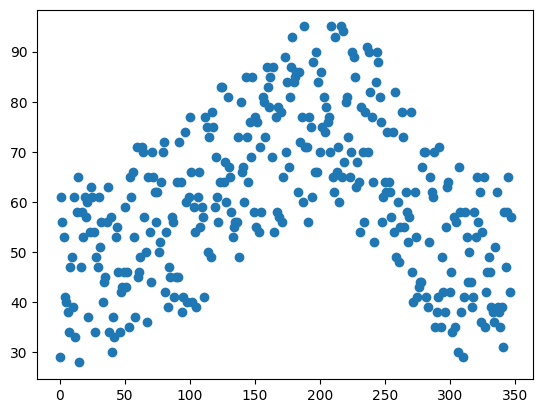

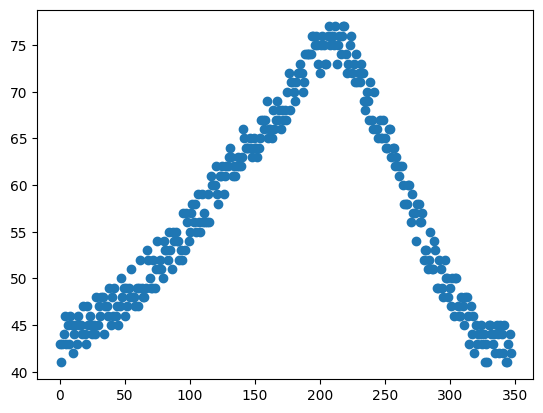

In [3]:
# Scatter plot for 'actual' temperature
plt.scatter(df.index, df['actual'])
plt.title('Actual Temperature Over Time')
plt.show()

# Scatter plot for 'temp_1' (temperature from one day prior)
plt.scatter(df.index, df['temp_1'])
plt.title('Previous Day Temperature (temp_1) Over Time')
plt.show()

# Scatter plot of 'temp_2' (temperature from two days prior)
plt.scatter(df.index, df['temp_2'])
plt.show()

# Scatter plot of 'friend' (friend's forecast)
plt.scatter(df.index, df['friend']) # [cite: 190]
plt.show()

# Scatter plot of 'forecast_noaa' (NOAA's forecast)
plt.scatter(df.index, df['forecast_noaa'])
plt.show()

#### Data Preprocessing

In [4]:
# One-hot encode categorical features ('week' column)
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [5]:
# Define the target variable (y) and features (X)
y = np.array(df['actual'])
df = df.drop('actual', axis=1)

# Drop columns that are forecasts from other models
df = df.drop('forecast_noaa', axis=1)
df = df.drop('forecast_acc', axis=1)
df = df.drop('forecast_under', axis=1)

# Create a list of feature names and convert dataframe to a numpy array
X = np.array(df)

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=5)

df.head()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,41,False,False,False,False,False,True,False


#### Model Training and Prediction

In [6]:
# Instantiate the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, random_state=5)

# Train the model on the training data
rf.fit(Xtrain, ytrain)

# Make predictions on the test data
pred = rf.predict(Xtest)

#### Model Evaluation

In [7]:
# Calculate the absolute errors
errors = abs(pred - ytest)

# Print the Mean Absolute Error (MAE)
print('\nMean absolute error =', round(np.mean(errors), 2), 'degrees.')

# Calculate and print the Median Absolute Error
print('Median absolute error =', met.median_absolute_error(pred, ytest))

# Calculate Mean Absolute Percentage Error (MAPE) and accuracy
mape = 100 * (errors / ytest)
accuracy = 100 - np.mean(mape)
print('Accuracy =', accuracy, '%')


Mean absolute error = 3.8 degrees.
Median absolute error = 3.3599999999999994
Accuracy = 93.81245775201744 %
